In [74]:
%matplotlib inline

import torch
from torch import nn as nn
from torch.nn import functional as F
from torch.autograd import Variable
from torch import stack
import time
import numpy as np
import timeit
from matplotlib import pyplot as plt

In [95]:

class MaskedMSELoss(nn.MSELoss):
    r"""Creates a criterion that measures the mean squared error (squared L2 norm) between
    each element in the input `x` and target `y`, augmented with target > threshold mask

    The loss can be described as:

    .. math::
        \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
        l_n = \left( x_n - y_n \right)^2,

    where :math:`N` is the batch size. If reduce is ``True``, then:

    .. math::
        \ell(x, y) =
        \begin{cases}
            \operatorname{mean}(L), & \text{if}\; \text{size\_average} = \text{True},\\
            \operatorname{sum}(L),  & \text{if}\; \text{size\_average} = \text{False}.
        \end{cases}

    The target is masked using:

    .. math::

        mask = (target > threshold).type(target.type())


    The mean square error loss is only evaluated on pixels that are contained in the mask. The output MSE loss
    is averaged with the batch size

    Args:
        reduction is fixed to 'mean' for in-house purposes
        input (array-like): The input tensor
        target (array-like): The target tensor
        threshold (floating point number): Threshold applied to the target under which the loss is not calculated

    Shape:
        - Input: :math:`(N, *)` where `*` means, any number of additional
          dimensions
        - Target: :math:`(N, *)`, same shape as the input

    Examples::

        >>> loss = nn.MSELoss()
        >>> input = torch.randn(3, 5, requires_grad=True)
        >>> target = torch.randn(3, 5)
        >>> output = loss(input, target)
        >>> output.backward()
    """
    def __init__(self, reduction='mean', threshold=0):
        super(nn.MSELoss, self).__init__(size_average=None, reduce=None, reduction=reduction)
        self.reduction = reduction
        self.threshold = threshold

    def forward(self, input, target):
        mask = target > self.threshold
        out = F.mse_loss(torch.masked_select(input, mask),
                         torch.masked_select(target, mask),
                         reduction='sum')
        if self.reduction == 'sum':
            pass
        elif self.reduction == 'mean':
            out.div_(input.size(0))
        else:
            raise NotImplementedError('reduction should be sum | mean. Unknown value: {}'.format(self.reduction))
        return out


def MaskedMSELossFunc(input, target, threshold=0):
    r"""Creates a criterion that measures the mean squared error (squared L2 norm) between
    each element in the input `x` and target `y`, augmented with target > threshold mask

    The loss can be described as:

    .. math::
        \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
        l_n = \left( x_n - y_n \right)^2,

    where :math:`N` is the batch size. If reduce is ``True``, then:

    .. math::
        \ell(x, y) =
        \begin{cases}
            \operatorname{mean}(L), & \text{if}\; \text{size\_average} = \text{True},\\
            \operatorname{sum}(L),  & \text{if}\; \text{size\_average} = \text{False}.
        \end{cases}

    The target is masked using:

    .. math::

        mask = (target > threshold).type(target.type())


    The mean square error loss is only evaluated on pixels that are contained in the mask. The output MSE loss
    is averaged with the batch size

    Args:
        reduction is fixed to 'mean' for in-house purposes
        input (array-like): The input tensor
        target (array-like): The target tensor
        threshold (floating point number): Threshold applied to the target under which the loss is not calculated

    Shape:
        - Input: :math:`(N, *)` where `*` means, any number of additional
          dimensions
        - Target: :math:`(N, *)`, same shape as the input

    Examples::

        >>> loss = nn.MSELoss()
        >>> input = torch.randn(3, 5, requires_grad=True)
        >>> target = torch.randn(3, 5)
        >>> output = loss(input, target)
        >>> output.backward()
    """
    mask = target > threshold
    return F.mse_loss(torch.masked_select(input, mask),
                      torch.masked_select(target, mask),
                      reduction='sum').div(input.size(0))



In [98]:
i.mul_(50)

tensor([[[[-4.3254e+01,  2.7958e+02, -1.1480e+02,  ..., -1.9091e+02,
            2.7754e+02,  2.7731e+01],
          [-3.4527e+01,  2.3807e+01,  2.0243e+02,  ...,  4.4729e+02,
            6.2034e+02, -1.8864e+02],
          [ 1.2877e+02,  2.3461e+02, -5.6008e+02,  ...,  2.4260e+02,
            6.4908e+00, -2.2984e+02],
          ...,
          [ 1.0465e+02, -1.2141e+02, -2.5101e+00,  ...,  1.7338e+02,
            2.3382e+02,  2.4418e+02],
          [ 1.4969e+02, -5.8253e+01,  2.1739e+02,  ...,  2.2368e+02,
           -9.2690e+00,  9.1248e+01],
          [-6.9034e+00,  1.3042e+02,  1.5116e+02,  ...,  1.9448e+01,
            2.6557e+02,  5.3585e+02]]],


        [[[ 3.9849e+02,  1.7899e+02, -5.0961e+01,  ..., -3.1241e+01,
           -1.3056e+02, -1.9713e+02],
          [-2.6426e+02, -1.7851e+02,  6.7901e+02,  ..., -1.5844e+02,
           -2.2703e+02,  2.3398e+02],
          [ 2.7362e+02,  6.6530e+00, -2.2326e+02,  ...,  1.6439e+02,
           -1.3200e+02, -2.2242e+02],
          ...,
   

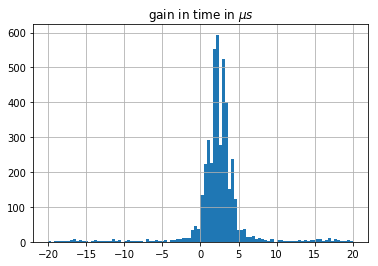

In [96]:
i = torch.randn(4,1,64,64)
t = torch.randn(4,1,64,64)

loss = MaskedMSELoss(reduction='mean', threshold=0.0)

times = np.zeros((5000, 2))
for idx in range(5000):
    
    s1 = time.time()
    loss1 = loss(i,t)
    s2 = time.time()
    loss2 = MaskedMSELossFunc(i,t, threshold=0.0)
    s3 = time.time()
    times[idx, 0] = 1000000 * (s2-s1)
    times[idx, 1] = 1000000 * (s3-s2)

plt.hist(times[:,0]-times[:,1], bins=100, range=(-20, 20), histtype='bar')
plt.title('gain in time in $\mu s$')
plt.grid(True)
plt.show()

In [ ]:
import torch
from torch import nn as nn
from torch.nn import functional as F
from torch.autograd import Variable
from torch import stack
from fetalnav.models.spn_models import vgg11_sp, vgg13_sp

model = vgg11_sp(num_classes=7, num_maps=512, batch_norm=True, in_channels=1)


In [ ]:
model

In [ ]:
modelcuda = torch.nn.DataParallel(model).cuda()
input_batch = torch.randn(4, 1, 112, 112)
o = modelcuda(Variable(input_batch))
print(o.shape)
o

In [ ]:
o[:,:,1]

In [ ]:
out = 0.
t

In [ ]:

class MultiLinearMultiLabelSoftMarginLoss(nn.MultiLabelSoftMarginLoss):

    def forward(self, input, target):
        out = 0.
        for idx in range(input.size(1)):
            class_input  = input[:, idx]
            class_target = target[:, idx]
            v = F.multilabel_soft_margin_loss(class_input, class_target, weight=self.weight)
            out += v
        return out

t = torch.zeros(o.size(0), o.size(1))
t[0,0] = t[0,1] = 1.
t[1,1] = t[1,2] = 1.
t[2,2] = t[1,3] = 1.
t[3,3] = t[1,4] = 1.
state = {}
state['output']= o.data.cpu()
state['target']= t


loss = MultiLinearMultiLabelSoftMarginLoss()

loss(Variable(state['output']), Variable(state['target']))

In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML

In [ ]:

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from scipy.misc import imresize
from scipy.ndimage import label
from spn.modules import SoftProposal

# helper functions

def hook_spn(model):
    if not (hasattr(model, 'sp_hook') and hasattr(model, 'fc_hook')):
        model._training = model.training
        model.train(False)
        
        def _pre_sp_hook(self, input, output):
            print(self.name)
            self.parent_modules[0].class_response_maps = output
        def sp_hook(self, input, output):
            print(self.name)
            self.parent_modules[0].class_response_maps = output
        def _fc_hook(self, input, output):
            if hasattr(self.parent_modules[0], 'class_response_maps'):
                self.parent_modules[0].class_response_maps = F.conv2d(self.parent_modules[0].class_response_maps, self.weight.unsqueeze(-1).unsqueeze(-1))
            else:
                raise RuntimeError('The SPN is broken, please recreate it.')
                
        sp_layers = []
        fc_layers = []
        for mod in model.modules():
            if isinstance(mod, SoftProposal):
                sp_layers.append(mod)
            elif isinstance(mod, torch.nn.Linear):
                fc_layers.append(mod)
        
        if not len(sp_layers) or not len(sp_layers):
            raise RuntimeError('Invalid SPN model')
        else:
            for s in sp_layers:
                s.parent_modules = [model]
                model.sp_hook = s.register_forward_hook(_sp_hook)
            for s in sp_layers:
                s.parent_modules = [model]
                model.fc_hook = s.register_forward_hook(_fc_hook)
    return model

def generate_outputs(model, in_var):

    from spn import hook_spn
    from torch.nn import functional as F

    if in_var.ndimension() == 3:
        input = in_var.unsqueeze(0)
    assert in_var.size(0) == 1, 'Batch processing is currently not supported'
    # enable spn inference mode
    model = hook_spn(model)
    # predict scores
    scores = torch.nn.Softmax(dim=1)(model(in_var)).data.cpu().squeeze()
    # instantiate maps
    maps = F.upsample(model.class_response_maps, size=(in_var.size(2), in_var.size(3)), mode='bilinear').data
    return scores.numpy(), maps

input_batch = torch.randn(1, 1, 112, 112)
a = generate_outputs(model, Variable(input_batch.cuda()))

a[1].shape

In [ ]:
a = nn.Linear(10,2)
a.named_parameters()